In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

In [4]:
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

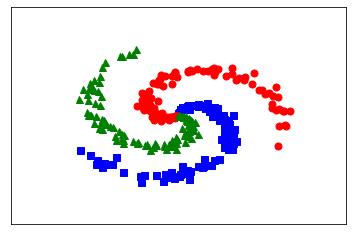

In [5]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [7]:
X.shape

(2, 300)

In [7]:
model = Sequential([
    Dense(15, activation='relu',input_shape=(2,)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(3,activation='softmax')
])

In [8]:
model = Sequential()
model.add(Dense(50, activation='relu',input_shape=(2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 5,403
Trainable params: 5,403
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
)


In [13]:
X = X.reshape((-1,2))
X.shape
y.shape


(300,)

In [14]:
H= model.fit(
    X,
    to_categorical(y),
    epochs=100,
    batch_size=32,    
)
print("xong!")

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 2ms/step - loss: 1.0718 - accuracy: 0.3800
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0455 - accuracy: 0.4367
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0220 - accuracy: 0.4400
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9995 -

10/10 [==============================] - 0s 4ms/step - loss: 0.8065 - accuracy: 0.5767
Epoch 74/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8062 - accuracy: 0.5900
Epoch 75/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8091 - accuracy: 0.5900
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8048 - accuracy: 0.5767
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8010 - accuracy: 0.5900
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.5867
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.5900
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.5900
Epoch 81/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.5800
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.5933
Epoch 83/100


In [15]:
model.evaluate(X,to_categorical(y))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 1ms/step - loss: 0.7846 - accuracy: 0.6033


[0.7846125364303589, 0.6033333539962769]

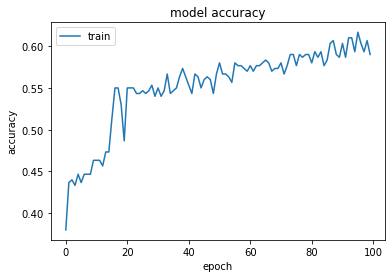

In [16]:
import keras
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()